## Trabalho de exploração de dados - [TURMA 01E] - 2022/2

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mtp
import numpy as np

### Carregando os dados:

In [391]:
brasil_data = pd.read_csv('datasets/wid_BR_data/WID_data_BR.csv', delimiter=';')
brasil_metadata = pd.read_csv('datasets/wid_BR_data/WID_metadata_BR.csv', delimiter=';')

## Explorando os dados

A tabela de dados tem informações descritas por códgigos. o próximo trecho foi recortado da documentação do dataset e ajuda a interpretar os códigos.

### How to Interpret Variable Codes

The meaning of each variable is described in the metadata files. The complete WID variable codes (i.e. sptinc992j) obey to the following logic:

* the first letter indicates the variable type (i.e. "s" for share).

* the next five letters indicate the income/wealth/other concept (i.e. "ptinc" for pre-tax national income).

* the next three digits indicate the age group (i.e. "992" for adults).

* the last letter indicate the population unit (i.e. "j" for equal-split).


Se procurarmos na tabela de metadados por um desses códigos também é possivel obter uma explicação mais detalhada.


In [392]:
display(brasil_data.shape)
display(brasil_metadata.shape)
display(brasil_data.head())
display(brasil_metadata.head())

(125832, 7)

(680, 19)

,country,variable,percentile,year,value,age,pop
0,BR,afiinc992j,p8p100,2001,36062.2,992,j
1,BR,afiinc992j,p8p100,2002,35440.4,992,j
2,BR,afiinc992j,p8p100,2003,33828.4,992,j
3,BR,afiinc992j,p8p100,2004,33887.4,992,j
4,BR,afiinc992j,p8p100,2005,34500.0,992,j


,country,variable,age,pop,countryname,shortname,simpledes,technicaldes,shorttype,longtype,shortpop,longpop,shortage,longage,unit,source,method,extrapolation,data_points
0,BR,accmhni992,992,i,Brazil,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,BRL,[URL][URL_LINK]http://wordpress.wid.world/docu...,WID.world estimations as a proportion of GDP b...,NaN,NaN
1,BR,accmhni999,999,i,Brazil,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,BRL,[URL][URL_LINK]http://wordpress.wid.world/docu...,WID.world estimations as a proportion of GDP b...,NaN,NaN
2,BR,accmhoi992,992,i,Brazil,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,BRL,[URL][URL_LINK]http://wordpress.wid.world/docu...,WID.world estimations as a proportion of GDP b...,NaN,NaN
3,BR,accmhoi999,999,i,Brazil,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,BRL,[URL][URL_LINK]http://wordpress.wid.world/docu...,WID.world estimations as a proportion of GDP b...,NaN,NaN
4,BR,accshni992,992,i,Brazil,Consumption of fixed capital attributable to o...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,BRL,[URL][URL_LINK]http://wordpress.wid.world/docu...,WID.world estimations as a proportion of GDP b...,NaN,NaN


### Obtendo dados da renda bruta média da população brasileira

Vamos usar a variavel "aptinc992j": a letra "a" indica que o valor é uma média, "ptinc" siginica pre tax national income, que seria equivalente a renda bruta, "992" indica que esses dados dizem respeito a população adulta e por fim o "j" indica que a unidade do valor "The base unit is the individual (rather than the household) but resources are split equally within couples."

In [393]:
# aptinc992j -> código representa a média da renda bruta da população adulta
brasil_national_income = brasil_data.loc[(brasil_data["variable"] == "aptinc992j")].copy()

# renda média anual -> renda média mensal
brasil_national_income["value"] = brasil_national_income["value"].div(13.3)
brasil_national_income = brasil_national_income[ brasil_national_income["year"] >= 2008]

display(brasil_national_income)

,country,variable,percentile,year,value,age,pop
196,BR,aptinc992j,p26p27,2008,874.060150,992,j
197,BR,aptinc992j,p26p27,2009,822.924812,992,j
198,BR,aptinc992j,p26p27,2010,873.360902,992,j
199,BR,aptinc992j,p26p27,2011,904.210526,992,j
200,BR,aptinc992j,p26p27,2012,950.511278,992,j
...,...,...,...,...,...,...,...
125323,BR,aptinc992j,p99.4p99.5,2017,58556.406015,992,j
125324,BR,aptinc992j,p99.4p99.5,2018,62277.203008,992,j
125325,BR,aptinc992j,p99.4p99.5,2019,59435.368421,992,j
125326,BR,aptinc992j,p99.4p99.5,2020,56165.774436,992,j


### Qual a renda média mensal de 90% da população brasileira? E dos 10% mais ricos?

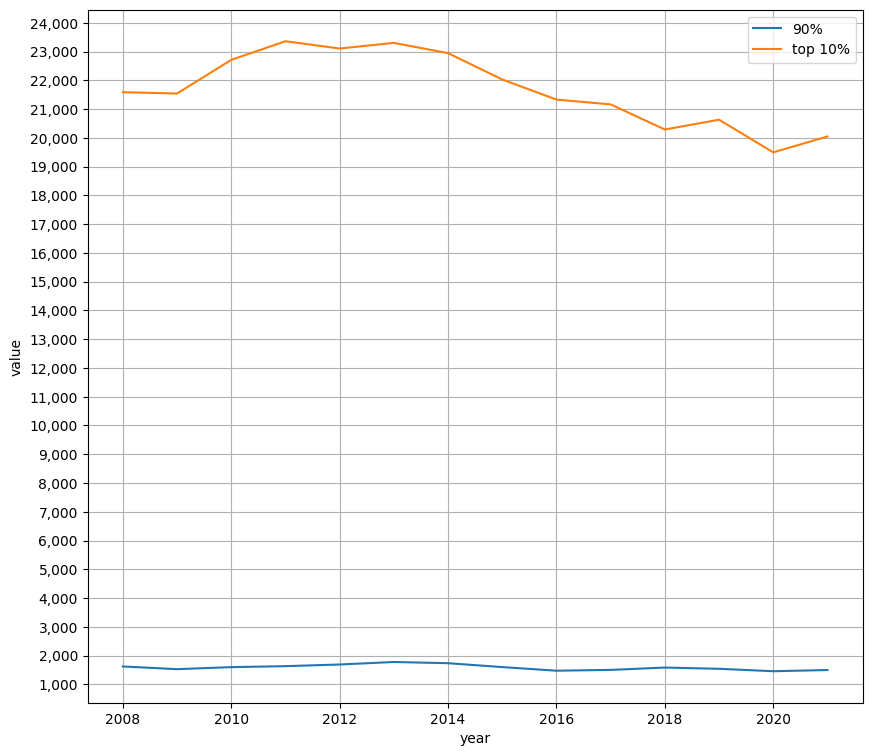

In [394]:
fig, ax = plt.subplots(figsize=(10,9))
ax.grid()
ax.ticklabel_format(style='plain')
ax.set_yticks(np.arange(1000, 30000, 1000))
ax.get_yaxis().set_major_formatter(mtp.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Qual a renda média mensal de 90% da população brasileira?
averagePreTaxNationalIncome = brasil_national_income.loc[(brasil_national_income["percentile"] == "p0p90") ]
sns.lineplot(data=averagePreTaxNationalIncome, x="year", y="value", ax=ax, label="90%")

# E dos 10% mais ricos?
averagePreTaxNationalIncome = brasil_national_income.loc[ (brasil_national_income["percentile"] == "p90p100") ]
sns.lineplot(data=averagePreTaxNationalIncome, x="year", y="value", ax=ax, label="top 10%")
plt.show()

### E dos 1% mais ricos?


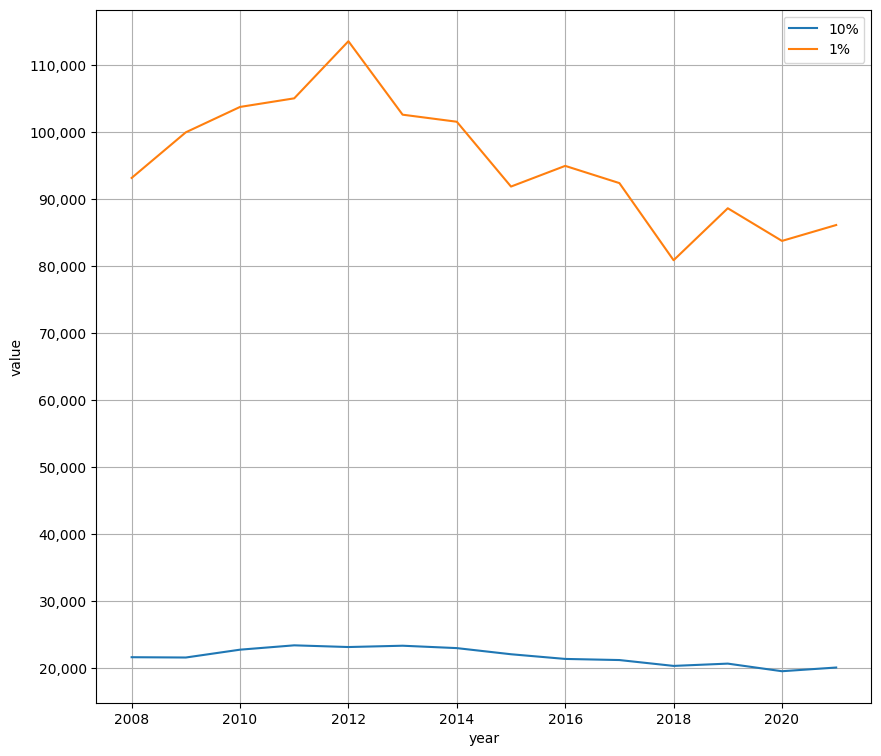

In [395]:
fig, ax = plt.subplots(figsize=(10,9))
ax.grid()
ax.ticklabel_format(style='plain')
ax.set_yticks(np.arange(20000, 160000, 10000))
ax.get_yaxis().set_major_formatter(mtp.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

averagePreTaxNationalIncome = brasil_national_income.loc[(brasil_national_income["percentile"] == "p90p100") ]
sns.lineplot(data=averagePreTaxNationalIncome, x="year", y="value", label="10%", ax=ax)

# e dos 1% mais ricos?
averagePreTaxNationalIncome = brasil_national_income.loc[(brasil_national_income["percentile"] == "p99p100") ]
sns.lineplot(data=averagePreTaxNationalIncome, x="year", y="value", label="1%", ax=ax)

plt.show()


Pelo gráfico acima é possivel observar que os 1% mais ricos do brasil tiveram uma média da renda brutal mensal de R$ 85000 no ano de 2020, enquanto os 10% mais ricos tiveram essa média igual a 20000 R$ por mês.

### Qual o mínimo de renda bruta para pertencer a um desses grupos?

Os valores acima são médias de todas as rendas que pertencem ao grupo, mas qual o valor minimo para que um individuo faça parte deles?

podemos usar a variavel com inicio "t", que siginifica threshold para obter essa informação.

<AxesSubplot: xlabel='year', ylabel='value'>

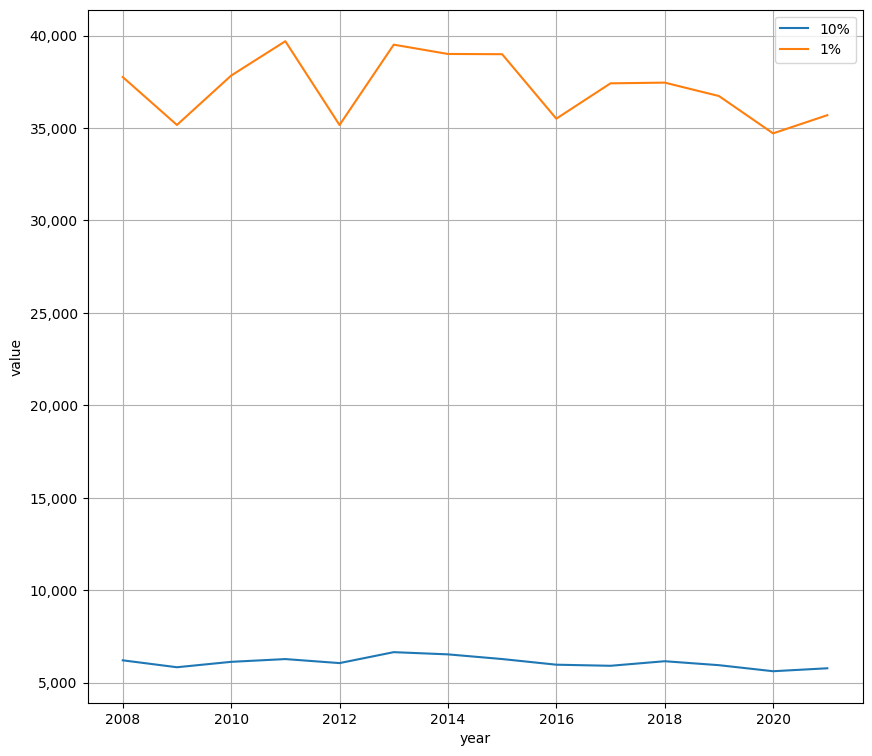

In [396]:
brasil_national_income = brasil_data.loc[(brasil_data["variable"] == "tptinc992j")].copy()

# renda média anual -> renda média mensal
brasil_national_income["value"] = brasil_national_income["value"].div(13.3)
brasil_national_income = brasil_national_income[ brasil_national_income["year"] >= 2008]

fig, ax = plt.subplots(figsize=(10,9))
ax.grid()
ax.ticklabel_format(style='plain')
#ax.set_yticks(np.arange(20000, 160000, 10000))
ax.get_yaxis().set_major_formatter(mtp.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


averagePreTaxNationalIncome = brasil_national_income.loc[(brasil_national_income["percentile"] == "p90p100") ]
sns.lineplot(data=averagePreTaxNationalIncome, x="year", y="value", label="10%", ax=ax)

averagePreTaxNationalIncome = brasil_national_income.loc[(brasil_national_income["percentile"] == "p99p100") ]
sns.lineplot(data=averagePreTaxNationalIncome, x="year", y="value", label="1%", ax=ax)


O grafico acima nos mostra que, em 2020, para estar entre os 10% mais ricos do brasil, basta uma renda bruta mensal de R$ 5200, já para os 1%, uma renda mensal bruta de R$ 35000